In [1]:
import keras
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Add, Input, Multiply, Concatenate, GlobalAveragePooling2D
#from keras.applications.vgg16 import VGG16
from keras.applications.mobilenetv2 import MobileNetV2
import os, glob, random
from PIL import Image
import pickle
import numpy as np
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


In [2]:
batch_size = 11
num_classes = 2
#epochs = 50
epochs = 100
#data_augmentation = False
#num_predictions = 20
#save_dir = os.path.join(os.getcwd(), 'saved_models')
model_path = 'C:/Users/Hira/Desktop/Coffee Bean Size_05032020/32_32/Coffee_2019/mbnv2_model_5.h5'

img_width = 128
img_height = 128

train_dir = 'C:/Users/Hira/Desktop/Coffee Bean Size_05032020/32_32/Coffee_2019/Train/'
validation_dir = 'C:/Users/Hira/Desktop/Coffee Bean Size_05032020/32_32/Coffee_2019/Validation/'

class_label = ['OK', 'NG']

In [3]:
#input_tensorの定義
input_tensor = Input(shape=(img_width, img_height, 3))
#Create the base model from the pre-trained convnets
model = MobileNetV2(include_top=False, weights='imagenet', input_tensor=input_tensor)

#model.summary()

top_model = Sequential()
#top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(GlobalAveragePooling2D())  #Global Average Pooling 層の良いポイント,パラメーター数を非常に少なくすることができる→　モデルが単純になり、過学習をしにくくなる
top_model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
top_model.add(BatchNormalization())
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# mobilenetv2とtop_modelを連結
model = Model(inputs=model.input, outputs=top_model(model.output))

'''
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)))
#model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
#model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
#model.add(Activation('sigmoid'))
'''

C:\Users\Hira\Anaconda3\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


"\nmodel = Sequential()\nmodel.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)))\n#model.add(Activation('relu'))\nmodel.add(Conv2D(32, (3, 3), activation='relu', padding='same'))\n#model.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\n\nmodel.add(Conv2D(64, (3, 3), activation='relu', padding='same'))\n#model.add(Activation('relu'))\nmodel.add(Conv2D(64, (3, 3), activation='relu', padding='same'))\n#model.add(Activation('relu'))\nmodel.add(Conv2D(64, (3, 3), activation='relu', padding='same'))\n#model.add(Activation('relu'))\nmodel.add(Conv2D(64, (3, 3), activation='relu', padding='same'))\n#model.add(Activation('relu'))\nmodel.add(Conv2D(64, (3, 3), activation='relu', padding='same'))\n#model.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel.add(Flatten())\nmodel.add(Dense(512, activation='relu'))\n#model.add(Activation('relu'))\nmodel.add(Dropout(0.5))\nmodel.add(De

In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [4]:
from keras.callbacks import ModelCheckpoint

#img_width, img_height = 128, 128
nb_train_samples = 2670 
nb_validation_samples = 334 
epochs = 100
batch_size = 11
nb_category = 2

callbacks = list()
callbacks.append(ModelCheckpoint(filepath="C:/Users/Hira/Desktop/Coffee Bean Size_05032020/32_32/Coffee_2019/mbnv2_model_5.h5"))

model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.RMSprop(lr=0.0001),
                  metrics=['accuracy'])

'''
model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
'''

check_point = keras.callbacks.ModelCheckpoint(
        filepath = os.path.join('mbnv2_model{epoch:02d}-vacc{val_acc:.2f}.hdf5'), 
        monitor='val_acc', verbose=0, save_best_only=True, mode='max')
    

train_datagen=ImageDataGenerator(
    rescale=1./255,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True
)

validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    #shuffle=True
)

validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    #shuffle=True
)

history = model.fit_generator(
        train_generator,
        steps_per_epoch=25,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=10,
        #callbacks=[check_point]
        callbacks=callbacks
)

'''
history=model.fit_generator(train_generator,
                         steps_per_epoch=nb_train_samples // batch_size,
                         epochs=epochs,
                         verbose=1,
                         validation_data=validation_generator,
                         validation_steps=nb_validation_samples // batch_size,
                         #callbacks=[CSVLogger(file_name+'.csv')],
                         callbacks=callbacks
                        )
'''
model.save(model_path)
print('\nSaved trained model at --> %s ' % model_path)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/Hira/Desktop/Coffee Bean Size_05032020/32_32/Coffee_2019/Train/'

In [6]:
from keras.optimizers import SGD,Adam
#for test
from keras.models import model_from_json
import matplotlib.pyplot as plt
import numpy as np
import os,random
from keras.preprocessing.image import img_to_array, load_img

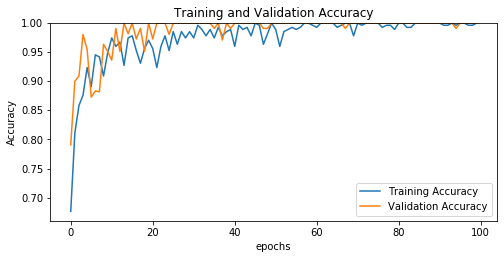

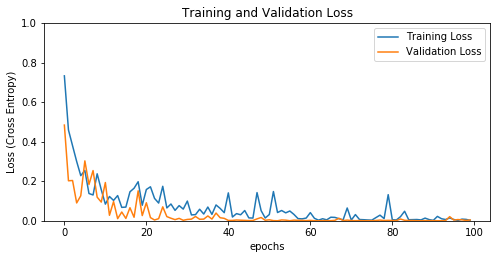

In [7]:
"""
history = model.fit_generator(train_generator,
                    steps_per_epoch=25,
                    epochs=4,validation_data=validation_generator,
                    validation_steps=10,verbose=1) 

Learning curves
Let's take a look at the learning curves of the training and 
validation accuracy/loss when using the MobileNet V2 base model as a fixed feature extractor.
https://www.tensorflow.org/tutorials/images/transfer_learning
"""
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('epochs')
plt.show()

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss (Cross Entropy)')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.show()

In [8]:
from keras.optimizers import SGD,Adam
#for test
from keras.models import model_from_json
import matplotlib.pyplot as plt
import numpy as np
import os,random
from keras.preprocessing.image import img_to_array, load_img

print("Wainting...")
#img_width, img_height = 128,128
nb_test_samples = 334
#batch_size = 1
nb_category = 2

batch_size=11
#file_name='vgg16_been_224'
test_dir='C:/Users/Hira/Desktop/Coffee Bean Size_05032020/32_32/Coffee_2019/Test/'
#display_dir='/home/reeen/Documents/keras/cnn3display'
label=['OK','NG']

print("Wainting...")

#load model and weights
#json_string=open(file_name+'.json').read()
#model=model_from_json(json_string)
model.load_weights(model_path)
#model.load_weights('/home/reeen/Documents/keras/cnn5/models/vgg16_weight_epoch978.h5')

model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
model.compile(optimizer=SGD(lr=0.0001,momentum=0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
#data generate
test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    #shuffle=True
)

#evaluate model
score=model.evaluate_generator(
    test_generator,
    steps=nb_test_samples,
     verbose=1)
print('\n test loss:',score[0])
print('\n test_acc:',score[1])

Wainting...
Wainting...
Found 334 images belonging to 2 classes.
334/334 [==============================] - 64s 192ms/step

 test loss: 0.015244201436689208

 test_acc: 0.9938956731134462
